###  Process overview 
1.Data collecction

2.data preprocessing

3.select model

4.fit model(X-train,y_train)

5.predict y_pred_train over X_train: y_pred_test over X_test

6.Train Accuracy,test accuarcy,confusion matrix,classification report ,and AUC

7.Tune the model by changing the parameters of the model(hyper parameter tuning)


 ### Importing required libraries 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
cd D:\Data scientist file\Data sets

D:\Data scientist file\Data sets


### Importing Data set 

In [5]:
dataset=pd.read_csv('Social Network_Ads.csv')

In [6]:
dataset.head(10)  # first 10 rows of the dataset 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [7]:
dataset.shape  # shape of the dataset( number of rows and number of columns )

(400, 5)

In [8]:
dataset.info()   # dataset information / type of dataset in each features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In this dataset purchased is the dependent feature where are 

"userid, Gender, Age and EstimatedSalary" is the independent feature. 

We will not consider userid and gender in our model building as this is not expressing much with dependent variable.

In [9]:
X=dataset.iloc[:,[2,3]].values   
y=dataset.iloc[:,4].values


pridicting the purchse by using age and estimated salary of the person 

In [11]:
# splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25,random_state=0)

splitting the data set for training and testing the model by 75/25

In [12]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# training the decision tree  Classification model on the training set

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

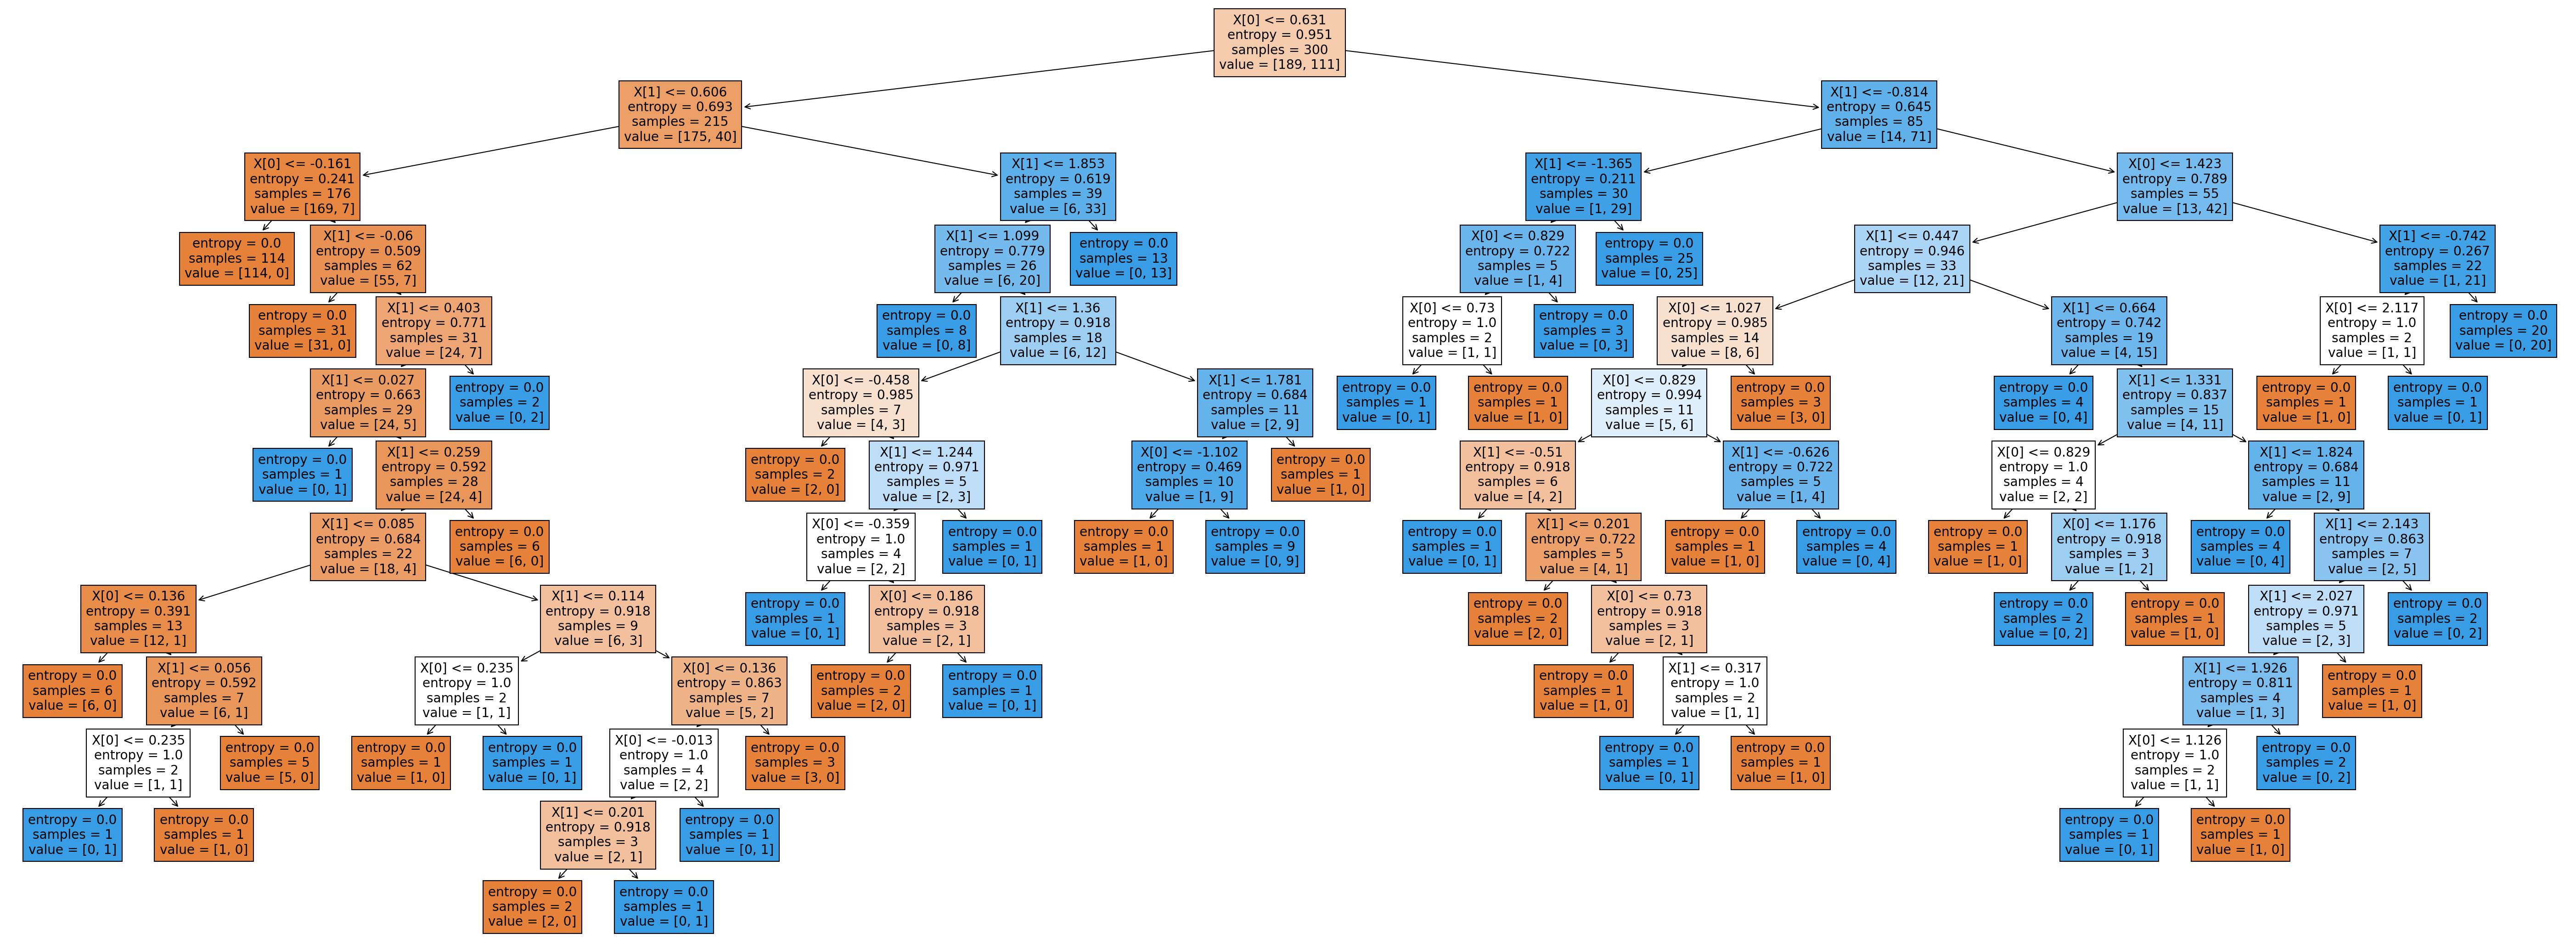

In [14]:
# Visualise the Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(48,18),dpi=150)
plot_tree(classifier,filled=True)
plt.show()

In [15]:
y_pred=classifier.predict(X_test)

In [17]:
print(y_pred)  

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


# Evaluation
Confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[61  3]
 [ 7 29]]


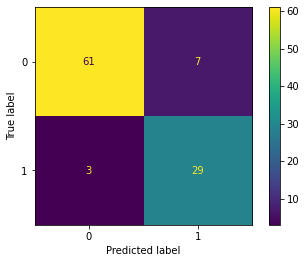

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,X_test,y_test)

In [20]:
#Accuracy
from sklearn.metrics import accuracy_score
print("Test Accuracy:",accuracy_score(y_test,y_pred))

Test Accuracy: 0.9


In [21]:
#classification report 

In [22]:
from sklearn.metrics import classification_report
print(classification_report,(y_test,y_pred))

<function classification_report at 0x000000000B58E940> (array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64))


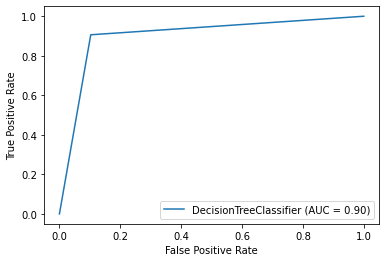

In [23]:
# AUC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier,X_test,y_test)
plt.show()

# feature importance


In [24]:
classifier.feature_importances_

array([0.47180519, 0.52819481])

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [26]:
y_pred=classifier.predict(X_test)

# Confusion Matrix


In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[63  5]
 [ 5 27]]


In [28]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[26,64,100,128,200]}
rfc=RandomForestClassifier()
grid=GridSearchCV(rfc,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [26, 64, 100, 128, 200]},
             scoring='accuracy')

In [29]:
grid.best_params_

{'n_estimators': 200}

In [30]:
predictions =grid.predict(X_test)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



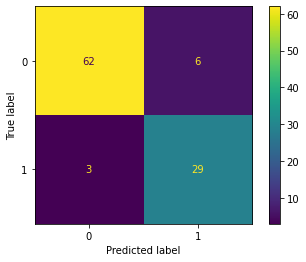

In [32]:
plot_confusion_matrix(grid,X_test,y_test)

# Boosting 
# Ada boost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
# build a model with default parameters 
model=AdaBoostClassifier()

In [35]:
model.fit(X_train,y_train)

AdaBoostClassifier()

In [36]:
predictions=model.predict(X_test)

# Evaluation 

In [37]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [38]:
accuracy_score(y_test,predictions)

0.92

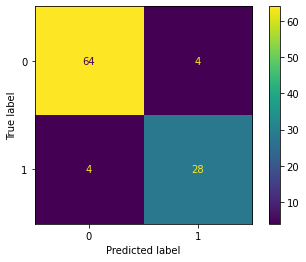

In [39]:
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [41]:
model.feature_importances_

array([0.46, 0.54])

# Analyzing performance as more weak learner are added.

In [42]:
error_rate = []
for n in range (1,96):
    model=AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    err=1-accuracy_score(y_test,preds)
    
    error_rate.append(err)
    

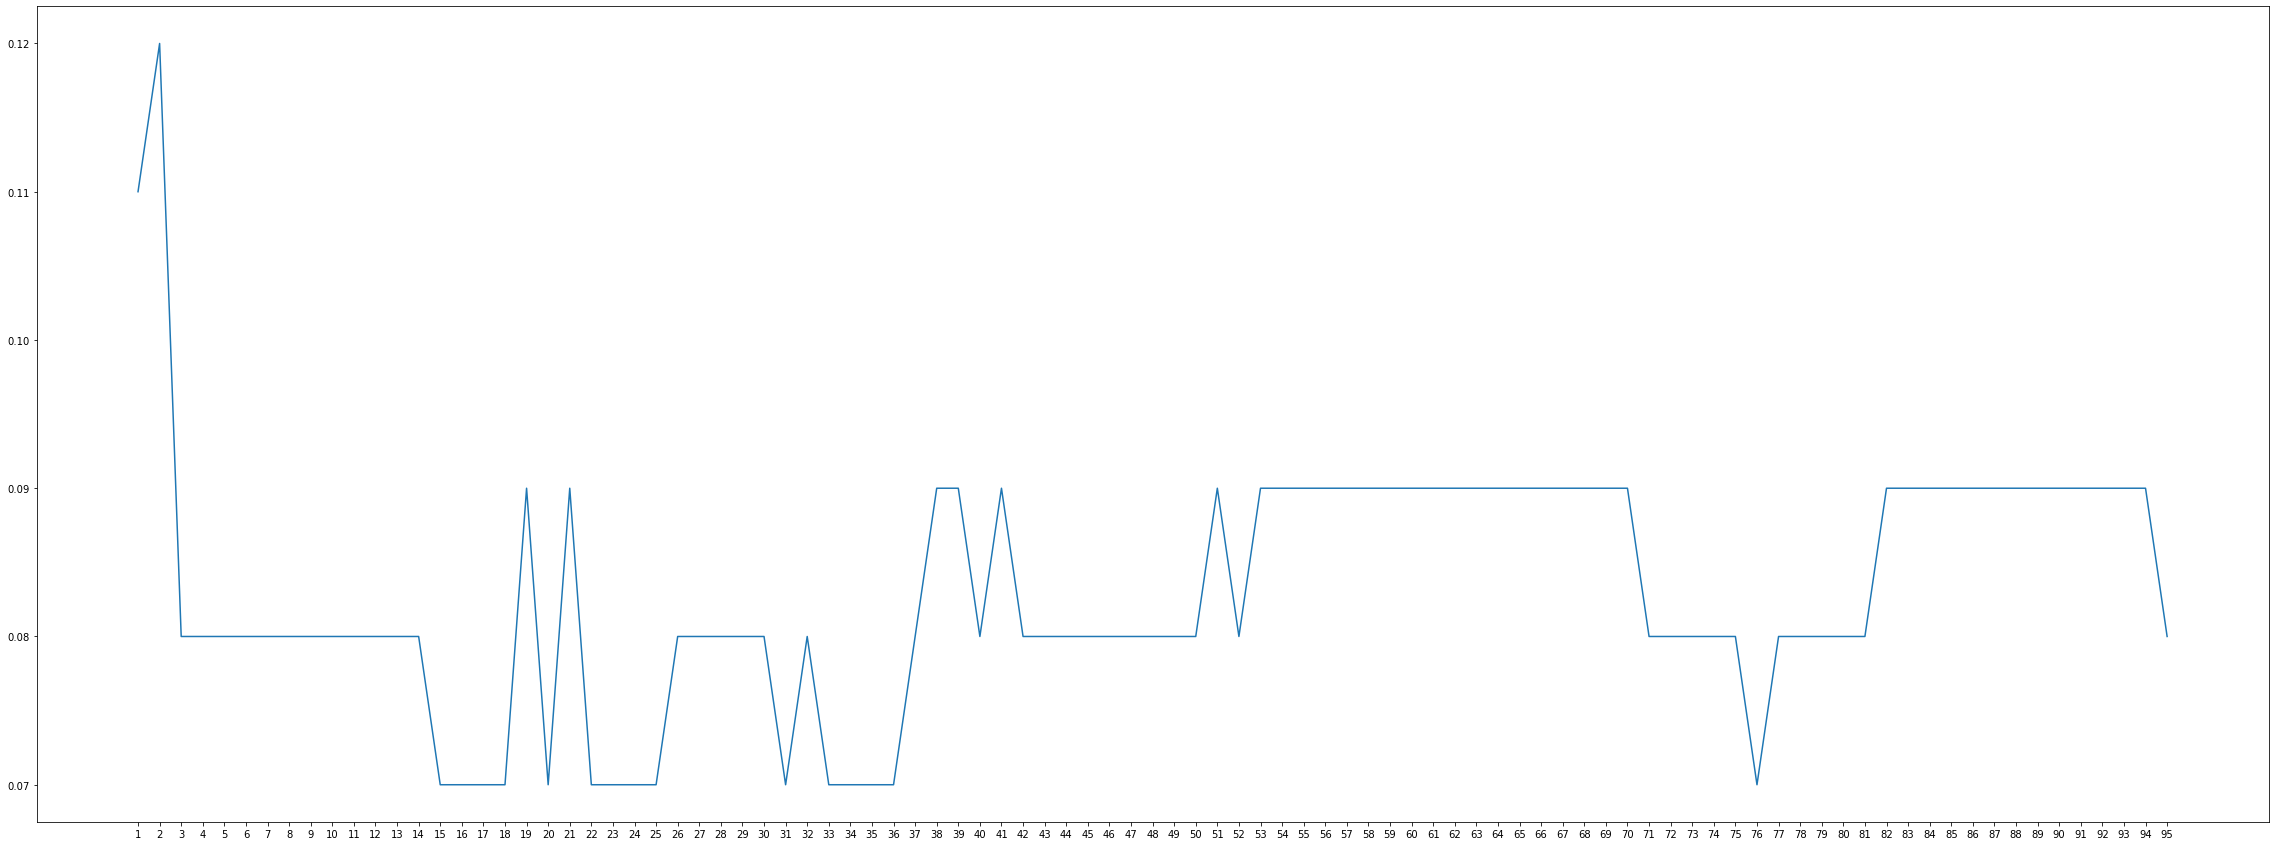

In [43]:
plt.figure(figsize=(40,15))
plt.plot(range(1,96),error_rate)
plt.xticks(list(range(1,96)))
plt.show()

# Final Model

In [44]:
final_model=AdaBoostClassifier(n_estimators=42)
final_model.fit(X_train,y_train)

preds_train=final_model.predict(X_train)
preds_test=final_model.predict(X_test)

print('Train Accuaracy:',accuracy_score(y_train,preds_train))
print('Test Accuarcy:',accuracy_score(y_test,preds_test))

Train Accuaracy: 0.9266666666666666
Test Accuarcy: 0.92


In [45]:
final_model.feature_importances_

array([0.52380952, 0.47619048])

In [46]:
feats=pd.DataFrame(data=final_model.feature_importances_,columns=['Importance'])
feats

,Importance
0,0.52381
1,0.47619


In [47]:
imp_feats=feats[feats['Importance']>0]

In [48]:
import seaborn as sns

<AxesSubplot:ylabel='Importance'>

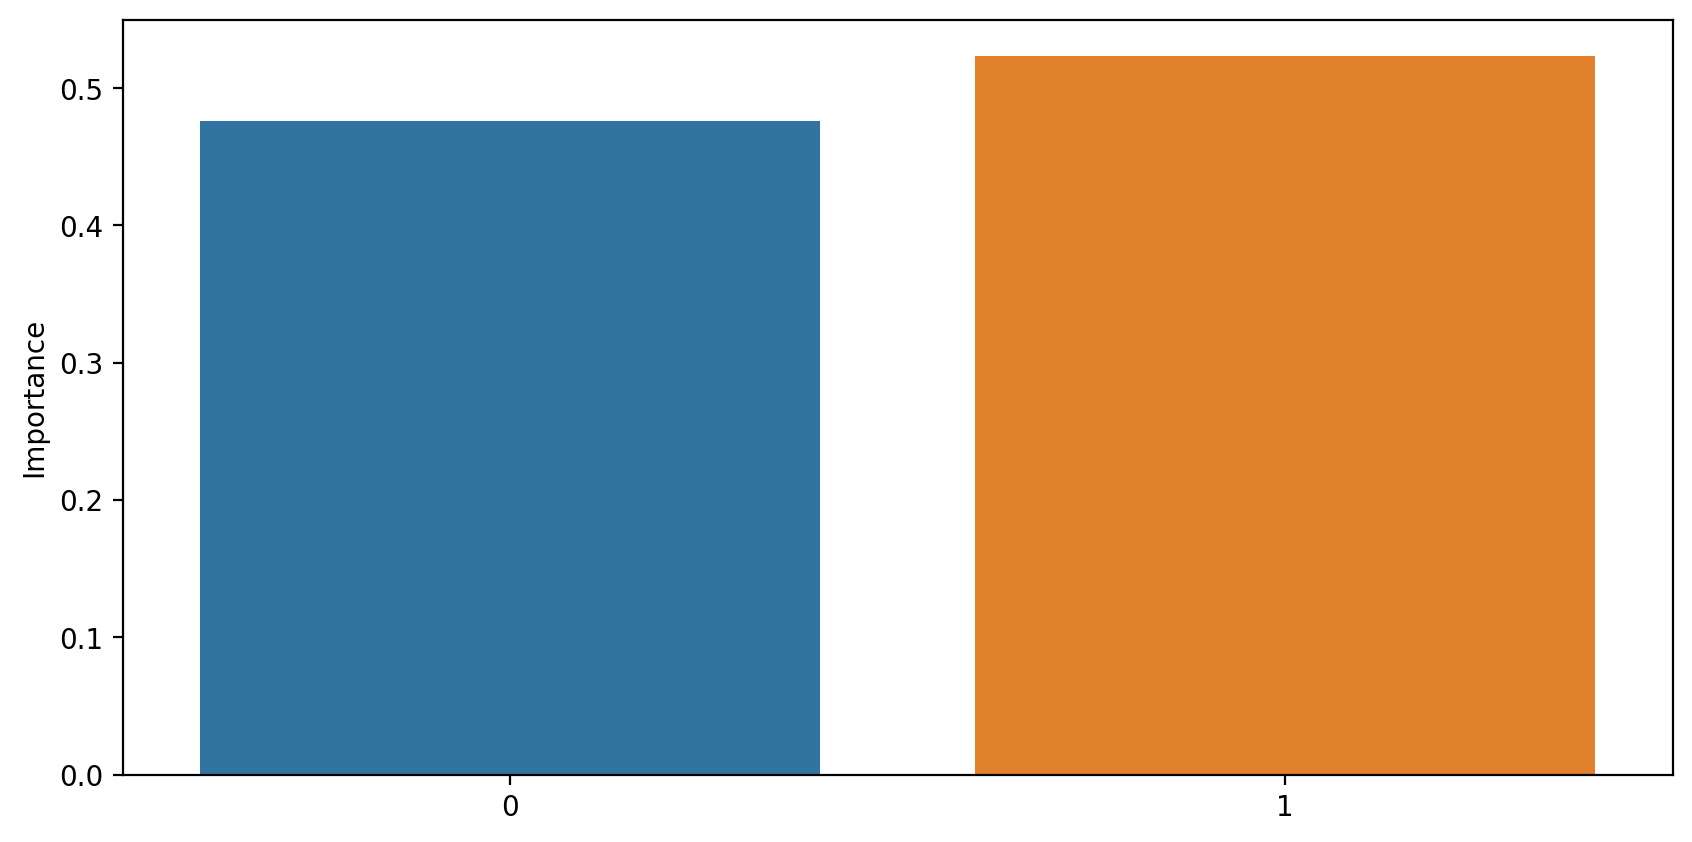

In [52]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')